In [6]:
import pandas as pd
import numpy as np

import wrangle_zillow

import seaborn as sns
import matplotlib.pyplot as plt



from scipy.stats import zscore, iqr, percentileofscore, scoreatpercentile

In [7]:
df = wrangle_zillow.get_zillow_data()

In [8]:
nulls_by_col = wrangle_zillow.nulls_by_col(df)

In [24]:
df.regionidneighborhood.isnull().sum()

46606

In [27]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [29]:
df.taxvaluedollarcnt.dropna(inplace=True)

In [11]:
# imputer, scaler, train, validate, test = prep_zillow(df)

In [12]:
# train.head()

NameError: name 'train' is not defined

In [15]:
from scipy.stats import zscore, iqr, percentileofscore, scoreatpercentile


# create a function that takes in a column and a method and returns outliers
IQR = (df.bathroomcnt.quantile(.75) - df.bathroomcnt.quantile(.25))*3


3.0

In [17]:
zscore(df.bathroomcnt)

array([ 1.20546271, -1.30276568, -0.29947432, ..., -1.30276568,
       -0.29947432, -0.29947432])

In [18]:
iqr(df.bathroomcnt)

1.0

In [19]:
percentileofscore(df.bathroomcnt, score=6)

99.31425625161124

In [20]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [30]:
def sum_outliers(column, iqr_k=5, std_k=2):
    IQR = iqr(column) * iqr_k
    print(f'IQR is {IQR}')
    iqr_mask = (column > column.median() + IQR)
    zscore_mask = zscore(column) > std_k
    return iqr_mask.sum(), zscore_mask.sum(), 100 - percentileofscore(column, score=IQR)
      

In [31]:
sum_outliers(df.taxvaluedollarcnt)

IQR is 1810505.0


(1329, 1977, 2.5006767295273136)

(array([ 8134., 11332., 13189., 12439.,  9514.,  6323.,  4326.,  2929.,
         2047.,  1392.,   966.,   780.,   591.,   499.,   405.,   341.,
          304.,   244.,   222.,   150.,   120.,   125.,    99.,   104.,
           82.,    96.,    58.,    64.,    68.,    57.]),
 array([-1.13748552, -0.87834596, -0.61920641, -0.36006686, -0.10092731,
         0.15821224,  0.41735179,  0.67649134,  0.93563089,  1.19477044,
         1.45390999,  1.71304955,  1.9721891 ,  2.23132865,  2.4904682 ,
         2.74960775,  3.0087473 ,  3.26788685,  3.5270264 ,  3.78616595,
         4.0453055 ,  4.30444506,  4.56358461,  4.82272416,  5.08186371,
         5.34100326,  5.60014281,  5.85928236,  6.11842191,  6.37756146,
         6.63670102]),
 <a list of 30 Patch objects>)

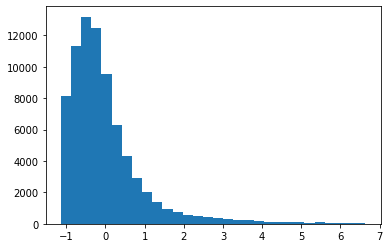

In [112]:
plt.hist(zscore(df.taxvaluedollarcnt.nsmallest(77000)), bins=30)

In [ ]:
i = 0
f = plt.figure(figsize=(25,50))
for x in df.columns: 
    if df[x].dtype == 'float64':
        df.dropna(inplace=True)
        i += 1
        f.add_subplot(11,5, i)
        plt.hist(zscore(df[x].nsmallest(77000)), bins=30)

In [110]:
def max_outlier(column):
    z_score = pd.Series(zscore(column))
    return z_score.nlargest(20)

In [111]:
max_outlier(df.bathroomcnt)

8550     15.753187
24732    10.736731
7193      8.730148
37195     8.730148
71728     8.730148
5060      7.726857
11050     7.726857
15962     7.726857
20049     7.726857
49267     7.726857
65137     7.726857
73494     7.726857
480       6.723565
4352      6.723565
6945      6.723565
7823      6.723565
17522     6.723565
18541     6.723565
25024     6.723565
28702     6.723565
dtype: float64

In [43]:
zscore(df.taxvaluedollarcnt).max()

74.2915791953803

In [44]:
df.taxvaluedollarcnt.max()

49061236.0

In [45]:
df.taxvaluedollarcnt.nlargest(20)

8550     49061236.0
16694    25381250.0
7823     24345695.0
36562    23858374.0
45588    22589311.0
76658    20203475.0
11050    19280700.0
39995    18812604.0
7193     16814671.0
14190    16497812.0
76998    15736374.0
37195    15623925.0
59423    15618488.0
66648    15533020.0
33248    13852918.0
72352    13600098.0
27914    13523065.0
16213    13198250.0
28702    13191321.0
43454    13128583.0
Name: taxvaluedollarcnt, dtype: float64

In [65]:
df.taxvaluedollarcnt.dtype

dtype('float64')

In [81]:
for x in df.columns:
    print(df[x].dtype)
    if df[x].dtype == 'float64':
    plt.hist(df[x], bins = 200)

int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
float64
float64
float64
object
object
object
object
object
object
object
object


In [74]:
for i in range(0,25):
    for x in df.columns:
        if df[x].dtype == 'float64':
            df[x].hist()
    f.add_subplot(5,5, i+1)
            df[x].hist()
plt.tight_layout()
plt.show()

IndentationError: unexpected indent (<ipython-input-74-1b12c1083118>, line 6)

In [82]:
f = plt.figure(figsize=(25,20))
for i in range(0,21):
    if len(train.groupby(train.iloc[:,i+3])) < 5:
        f.add_subplot(5,5, i+1)
        sns.barplot(data=train, y="is_churn", x=train.iloc[:,i+3])
        plt.title(train.columns[i+3])
plt.tight_layout()

plt.show()

NameError: name 'train' is not defined

<Figure size 1800x1440 with 0 Axes>

In [91]:
for x in df.columns:
    print(df.columns[df[x].isnull().mean() <= .70])
    

[['id' 'parcelid' 'airconditioningtypeid' 'architecturalstyletypeid'
  'basementsqft' 'bathroomcnt' 'bedroomcnt' 'buildingclasstypeid'
  'buildingqualitytypeid' 'calculatedbathnbr' 'decktypeid'
  'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
  'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
  'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
  'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
  'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
  'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
  'propertycountylandusecode' 'propertylandusetypeid'
  'propertyzoningdesc' 'rawcensustractandblock' 'regionidcity'
  'regionidcounty' 'regionidneighborhood' 'regionidzip' 'roomcnt'
  'storytypeid' 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
  'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
  'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
  'as